<a href="https://colab.research.google.com/github/SoumyojitMondal/AI_ML_Colab_Repo/blob/main/LinearRegression_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

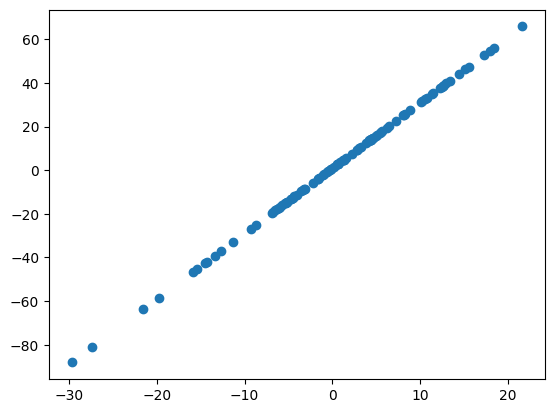

In [5]:
# Data generate X, Y
m = 100
X = np.random.randn(m)*10
noise = np.random.rand(m)
Y = 3*X +1 + noise
plt.scatter(X,Y)
plt.show()